In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Question 1

###   A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured. Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

## Ans

## Test to be conducted

###### We are going to conduct 2-tailed 2-Sample test to carryout our Hypothesis Test

## The Assumptions are

###### NULL HYPOTHESIS (H0) : µ1 = µ2


###### ALTERNATE HYPOTHESIS(H1): µ1 != µ2

###### Significance level is 5% and it is 2-tailed test so ɑ = 0.05/2

###### ɑ =  0.025

##### Importing Files

In [2]:
cutlets = pd.read_csv('Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


##### Applying Descriptive Statistics

In [3]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


##### Checking the data type

In [4]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


##### Checking Null Values

In [5]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

##### Checking Duplicate Values

In [6]:
cutlets[cutlets.duplicated()].shape

(0, 2)

In [7]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


###### Plotting data

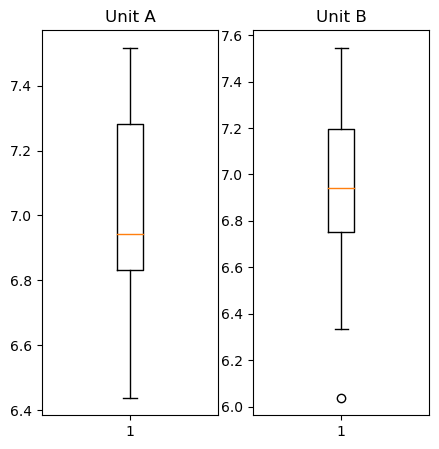

In [8]:
plt.subplots(figsize=(5,5))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()


Text(0.5, 1.0, 'Unit B')

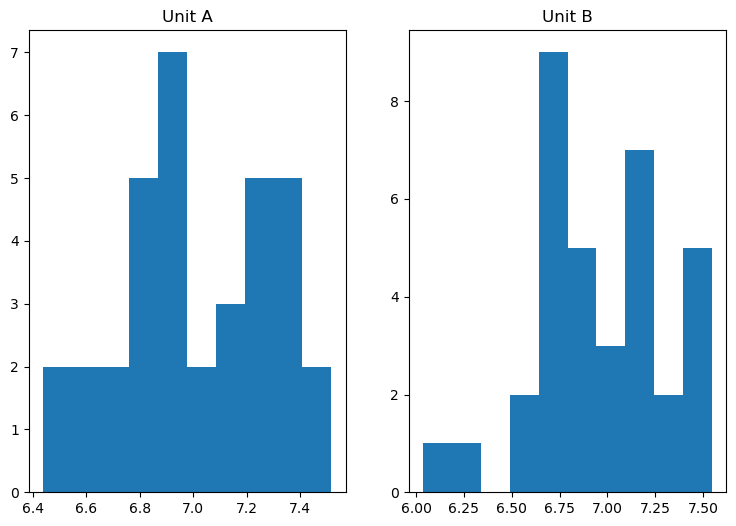

In [9]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins=10)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit B'],bins=10)
plt.title('Unit B')

C:\Users\nihaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nihaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


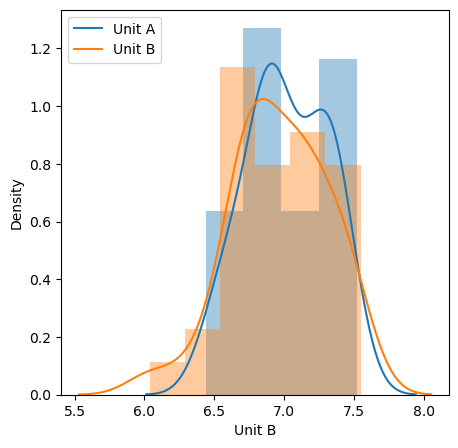

In [10]:
plt.figure(figsize=(5,5))
labels=['Unit A','Unit B']
sns.distplot(cutlets['Unit A'], kde=True)
sns.distplot(cutlets['Unit B'], kde=True)
plt.legend(labels)

#### Compare Evidences with Hypothesis using t-statistics

In [11]:
t_stat, p_value = stats.ttest_ind(cutlets['Unit A'], cutlets['Unit B'], alternative='two-sided')
print('p-value is :',p_value)

p-value is : 0.4722394724599501


### Compare p-value and Significance level(alpha)

###### If p-value < ɑ , Reject NULL Hypothesis

###### If p-value >ɑ , Accept NULL Hypothesis

In [12]:
alpha = 0.025
print('Significance = %.3f and p-value = %.3f'%(alpha,p_value))
if p_value <= alpha:
    print('We Reject NULL Hypothesis, There is suffient evidence to say the two Units have a significant Difference')
else:
    print('We Fail to Reject NULL Hypothesis, There is suffient evidence to say the two Units do not have a significant Difference')

Significance = 0.025 and p-value = 0.472
We Fail to Reject NULL Hypothesis, There is suffient evidence to say the two Units do not have a significant Difference


# 

# 

# Question 2 

### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 


###### ANS : We are going to use ANOVA test for this problem

#### Assumptions

###### The NULL Hypothesis(H0): There is no diiference between all the laboratory samples

###### The ALTERNATE Hypothesis(H1): Atleast one sample  is different

###### The Significance level is 5% which means ɑ = 0.05

###### Import data

In [13]:
lab = pd.read_csv('LabTAT.csv')
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


###### Checking Datatypes

In [14]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


###### Checking for NULL values

In [15]:
lab.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

###### Checking for Duplicate Values

In [16]:
lab[lab.duplicated()].shape

(0, 4)

###### Descriptive Statistics

In [17]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


###### Plotting the data

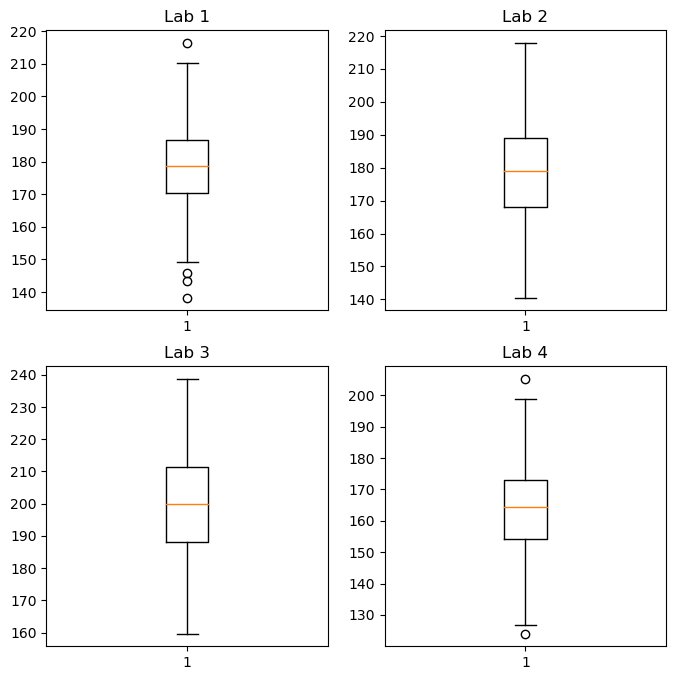

In [18]:
plt.subplots(figsize=(8,8))
plt.subplot(221)
plt.boxplot(lab['Laboratory 1'])
plt.title('Lab 1')
plt.subplot(222)
plt.boxplot(lab['Laboratory 2'])
plt.title('Lab 2')
plt.subplot(223)
plt.boxplot(lab['Laboratory 3'])
plt.title('Lab 3')
plt.subplot(224)
plt.boxplot(lab['Laboratory 4'])
plt.title('Lab 4')
plt.show()

C:\Users\nihaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nihaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nihaz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

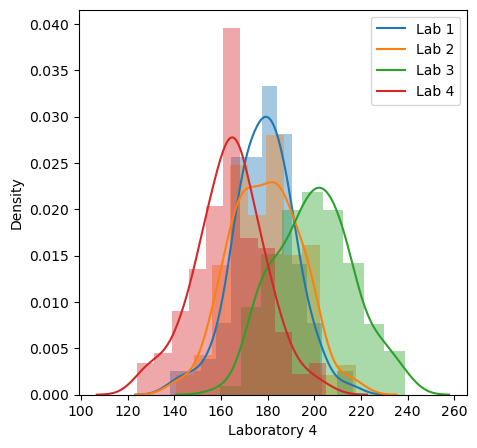

In [19]:
plt.subplots(figsize=(5,5))
labels = ['Lab 1','Lab 2','Lab 3','Lab 4']
sns.distplot(lab['Laboratory 1'], kde=True)
sns.distplot(lab['Laboratory 2'], hist=True)
sns.distplot(lab['Laboratory 3'], hist=True)
sns.distplot(lab['Laboratory 4'], hist=True)
plt.legend(labels)
plt.show()

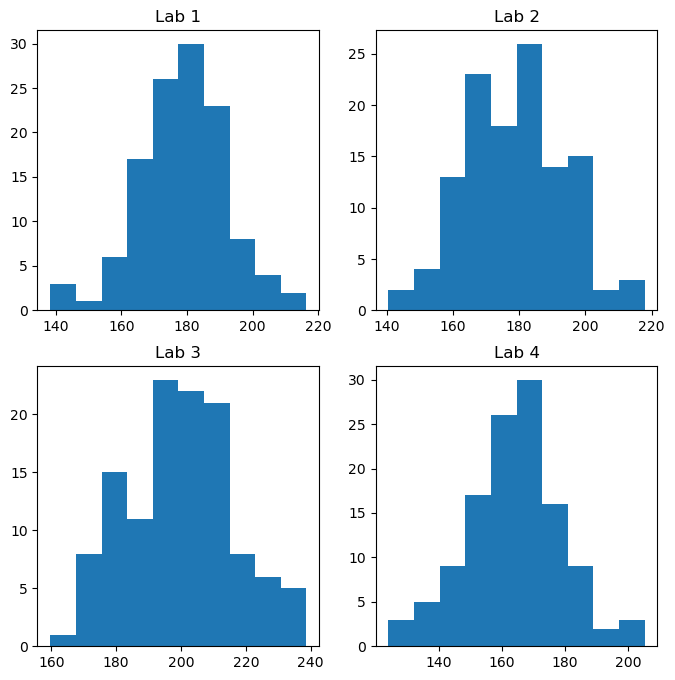

In [20]:
plt.subplots(figsize=(8,8))
plt.subplot(221)
plt.hist(lab['Laboratory 1'],bins=10)
plt.title('Lab 1')
plt.subplot(222)
plt.hist(lab['Laboratory 2'],bins=10)
plt.title('Lab 2')
plt.subplot(223)
plt.hist(lab['Laboratory 3'],bins=10)
plt.title('Lab 3')
plt.subplot(224)
plt.hist(lab['Laboratory 4'],bins=10)
plt.title('Lab 4')
plt.show()

###### Hypothesis Test

In [21]:
t_stat, p_value = stats.f_oneway(lab.iloc[:,0],lab.iloc[:,1],lab.iloc[:,2],lab.iloc[:,3])
p_value

2.1156708949992414e-57

In [22]:
alpha = 0.05
print('The Significance level (ɑ) = %.3f and p-value = %.3f' %(alpha, p_value))
if p_value<= alpha:
    print('We Reject NULL Hypothesis, We have enough evidence to determine that recorded TAT reports from 4 laboratories are not same')
else:
     print('We Accept NULL Hypothesis, We have enough evidence to determine that recorded TAT reports from 4 laboratories are same')


The Significance level (ɑ) = 0.050 and p-value = 0.000
We Reject NULL Hypothesis, We have enough evidence to determine that recorded TAT reports from 4 laboratories are not same


# 

# 

# 

# Question 3

## Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


### ANS : We are going to perform Chi-Square Test for this problem

###### Importing Data

In [23]:
buyer = pd.read_csv('BuyerRatio.csv')
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


### Assumptions

###### NULL Hypothesis (H0): There is no significant Association between Male-Female buyer ratios across regions
###### ALTERNATE Hypothesis (H1) : There is a significant Association between Male-Female buyer ratios across regions

###### We are taking Significance level of 5% 

###### Applying Chi-Square Contingency to get expected values   

In [24]:
stat, p, df, exp = stats.chi2_contingency(buyer.iloc[:,1:])
print('test statistic is %f, p-value is %f, degree of freedom is %d' %(stat,p,df),'\n and expected values are \n', exp)

test statistic is 1.595946, p-value is 0.660309, degree of freedom is 3 
 and expected values are 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


###### Now creating arrays of observed and expected values

In [25]:
observed = np.array([50,142,131,70,435,1523,1356,750])
expected = np.array([42.76531299 , 146.81287862 ,  131.11756787  , 72.30424052, 442.23468701 ,1518.18712138, 1355.88243213,  747.69575948])

#### Performing Chi-Square test 

In [26]:
statistic, p_value = stats.chisquare(observed,expected,ddof=df)
print('Test Statistic is %f \n P-Value is %f' %(statistic,p_value))

Test Statistic is 1.595946 
 P-Value is 0.809521


###### Since significance value is 5% , Alpha = 0.05

In [27]:
 alpha = 0.05
if p_value<= alpha:
    print('We reject NULL Hypothesis as there is a Significant Association betweem Male-Female buying ratio across the Regions')
else:
    print('We Fail to reject NULL Hypothesis as there is "NO" significant Association betweem Male-Female buying ratio across the Regions')

We Fail to reject NULL Hypothesis as there is "NO" significant Association betweem Male-Female buying ratio across the Regions


# 

# 

# Question 4

###     TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


### ANS : We are going to perform Chi-Square Test for this problem

###### Importing data  

In [28]:
data = pd.read_csv('Costomer+OrderForm.csv')
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


###### Descriptive Analysis

In [30]:
data.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


###### Checking for NULL values 

In [31]:
data.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

###### Value count

In [32]:
print(data['Phillippines'].value_counts() ,'\n', data['Indonesia'].value_counts(), '\n' , data['Malta'].value_counts(), '\n', data['India'].value_counts() )

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


### Assumptions

###### NULL Hypothesis (H0): There is no significant evidence that the defective % varies by centre
###### ALTERNATE Hypothesis (H1) : There is a significant evidence that the defective % varies by centre


###### We are taking Significance level of 5%

###### Applying Chi-Square Contingency to get expected values

In [33]:
con_table = [[271,267,269,280]
            ,[29,33,31,20]]

In [34]:
stat, p, df, exp = stats.chi2_contingency(con_table)
print('test statistic is %f, \n p-value is %f, \n degree of freedom is %d ,' %(stat,p,df),'\n and expected values are \n', exp)

test statistic is 3.858961, 
 p-value is 0.277102, 
 degree of freedom is 3 , 
 and expected values are 
 [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


###### Now creating arrays of observed and expected values

In [35]:
observed = np.array([271,267,269,280,29,33,31,20])
expected = np.array([271.75, 271.75, 271.75, 271.75 ,28.25,  28.25,  28.25,  28.25])

In [36]:
statistic, p_value = stats.chisquare(observed,expected,ddof=df)
print('Test Statistic is %f \n P-Value is %f' %(statistic,p_value))

Test Statistic is 3.858961 
 P-Value is 0.425430


###### Performing Chi-Square test

###### Since significance value is 5% , Alpha = 0.05

In [37]:
alpha = 0.05
if p_value<= alpha:
    print('We reject NULL Hypothesis as there is a Significant evidence that the defective % varies by centre.')
else:
    print('We FAIL to reject NULL Hypothesis as there is "NO" Significant evidence that the defective % varies by centre.')


We FAIL to reject NULL Hypothesis as there is "NO" Significant evidence that the defective % varies by centre.
